# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

from scipy.stats import multivariate_normal

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=[], num_clusters=0):
    plt.figure(figsize=(8, 4))
    color = ['#0000FF', '#00FF00', '#FF00FF', '#00FFFF', '#FF0000', '#FFFF00', '#00FFA6', '#FF7600', '#8000FF', '#F433FF', '#FF5733', '#8A2BE2', '#DE3163', '#6495ED', '#8F00FF', '#00FA9A', '#DC143C', '#1E90FF', '#00CED1', '#7FFF00', '#FF1493', '#FF4500', '#FF69B4', '#4169E1', '#FFD700', '#2E8B57', '#A0522D', '#B22222', '#9ACD32', '#DA70D6', '#7CFC00', '#F4A460', '#D2691E', '#FF8C00', '#9932CC', '#FF00FF', '#87CEEB', '#FF7F50', '#FFC0CB', '#9400D3', '#ADFF2F', '#00BFFF', '#FFB6C1', '#3CB371', '#FFA07A', '#FF6347', '#FF4500', '#BA55D3', '#4169E1', '#FFDAB9', '#00FF7F', '#8B008B', '#DB7093', '#FA8072', '#FF69B4', '#CD5C5C', '#FF8C00', '#A52A2A', '#FFDEAD', '#7B68EE', '#9400D3', '#20B2AA', '#FF69B4', '#FAEBD7', '#800080', '#FFA500', '#32CD32', '#FFFAFA', '#FFC0CB', '#FFD700', '#2E8B57', '#E6E6FA', '#FFB6C1', '#B0E0E6', '#C71585', '#FF1493', '#4682B4', '#9370DB', '#D2B48C', '#A0522D', '#A9A9A9', '#FFA07A', '#FFC0CB', '#FFE4B5', '#BC8F8F', '#98FB98', '#F0E68C', '#DAA520', '#FF8C00', '#FFEFD5', '#BDB76B', '#DDA0DD', '#00FF7F', '#B0C4DE', '#FFF0F5', '#BA55D3', '#F5DEB3', '#FFEBCD', '#F0FFF0', '#FFFFE0', '#FAFAD2', '#FFE4E1', '#FFF8DC', '#F5F5DC', '#BDB76B', '#E0FFFF', '#EEE8AA', '#FFEFDB', '#E6E6FA', '#FFF5EE', '#F5F5F5', '#FFE4C4', '#FFFFF0']
    alpha=0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
    plt.show()

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



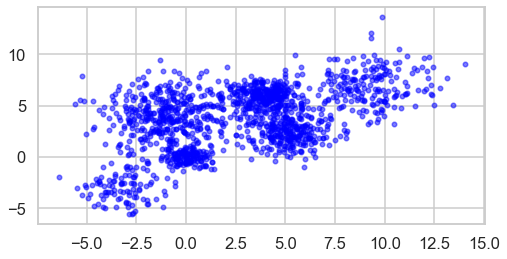

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:
# With 20 clusters
def kmeans_plob(Data):
    best_sil = -1
    best_k = 0
    
    distortions = []
    silhouettes = []
    for k in range(2,21,1):
        kmeans = KMeans(n_clusters=k).fit(Data)

        distortions.append(sum(np.min(cdist(Data, kmeans.cluster_centers_,'euclidean'), axis=1)) / Data.shape[0])
        sil = silhouette_score(Data, kmeans.labels_, metric='euclidean')
        silhouettes.append(sil)
        display_cluster(Data, km= kmeans , num_clusters=k)
        
        if (sil > best_sil) : 
            best_sil = sil
            best_k = k
                
    plt.figure(figsize=(8,4))
    plt.plot(range(2,21,1), distortions, 'bx-')
    plt.xticks(range(2,21,1))
    plt.xlabel('Values of K')
    plt.ylabel('Distortions')
    plt.title('The Elbow Method using distortions')
    plt.show()

    # Best value of K is 6
    plt.figure(figsize=(8,4))
    plt.plot(range(2,21,1), silhouettes, 'bx-')
    plt.xticks(range(2,21,1))
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette_Scores')
    plt.title('The silhouette_scores versus K')
    plt.show()
    
    print (f'best combination : best k = {best_k} , best_silhouette = {best_sil}' )       


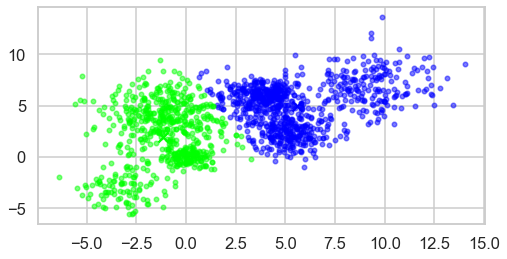

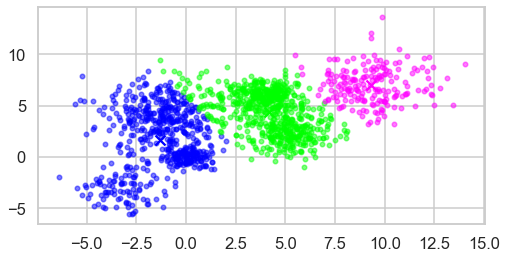

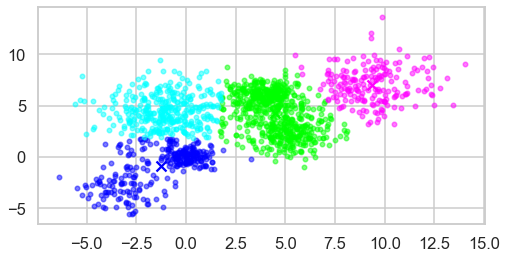

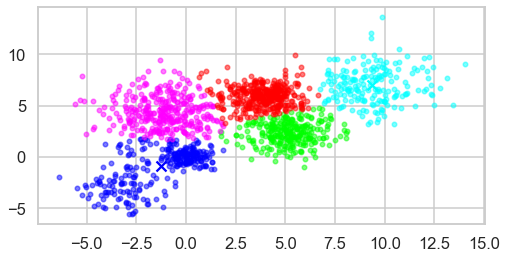

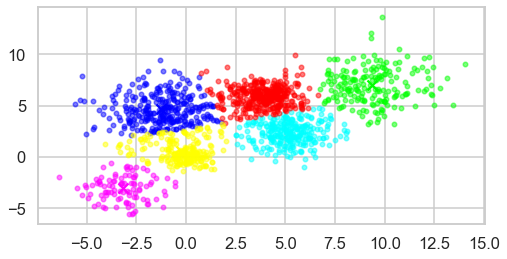

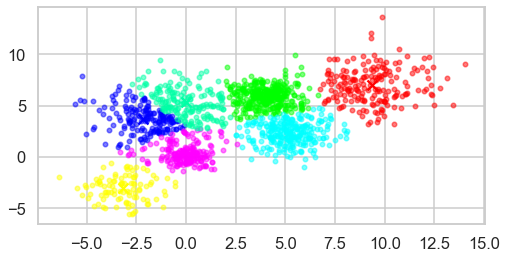

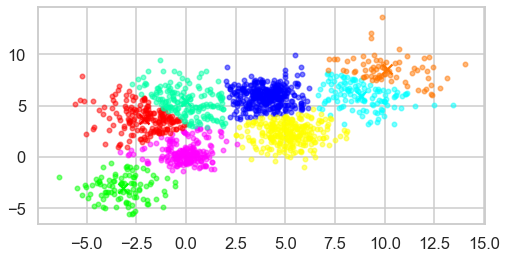

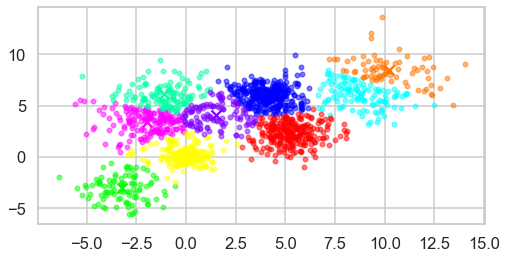

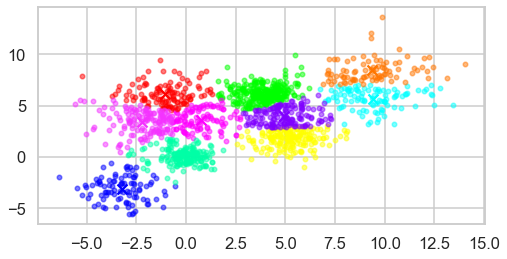

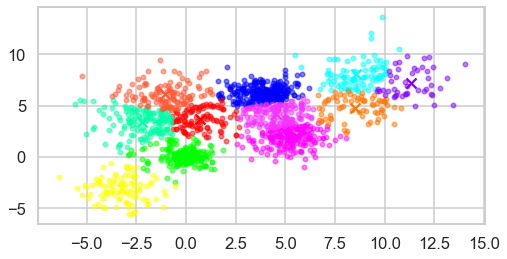

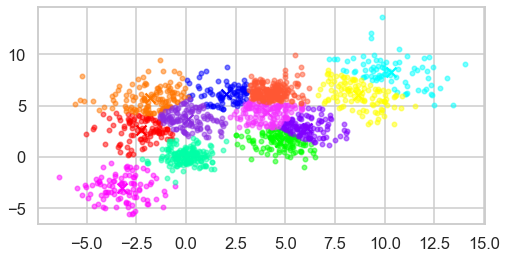

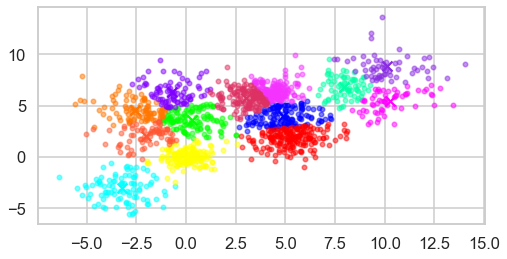

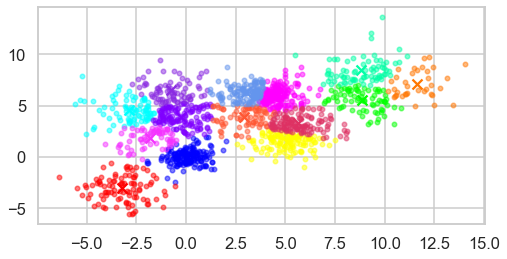

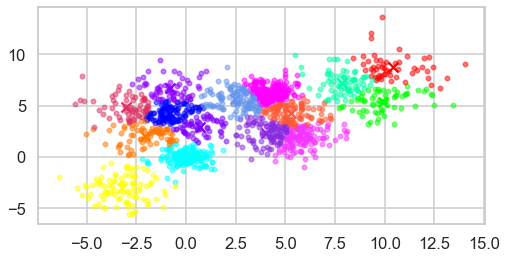

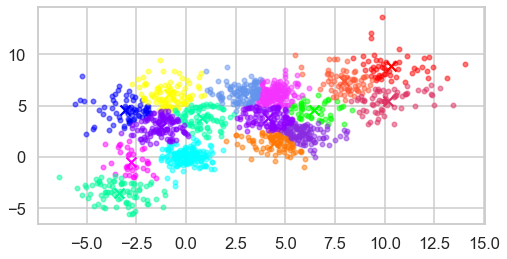

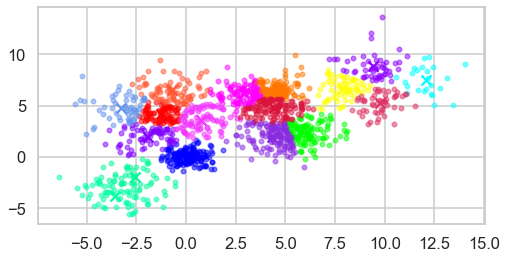

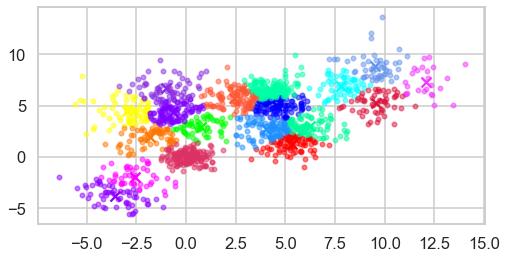

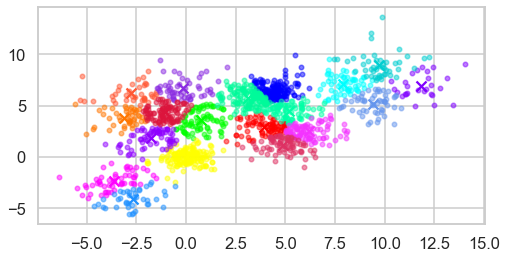

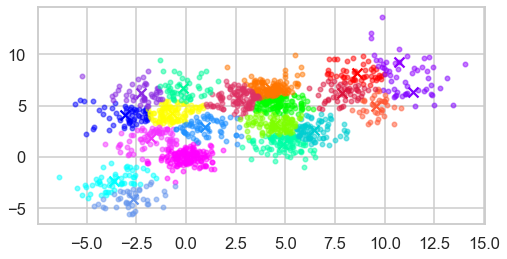

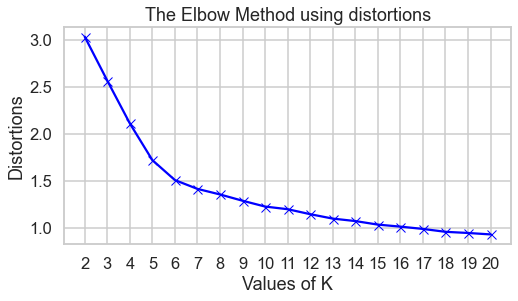

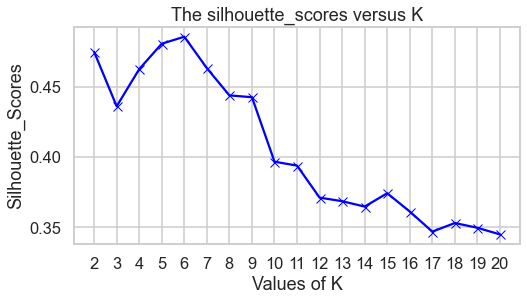

best combination : best k = 6 , best_silhouette = 0.4859737366910219


In [6]:
kmeans_plob(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [7]:
def agglomerative_plob(X, distance_threshold, n_clusters=None, affinity='euclidean', linkage='ward'):
    ACmodel = AgglomerativeClustering(distance_threshold=distance_threshold , n_clusters=n_clusters , affinity=affinity, linkage=linkage)
    ACmodel.fit(X)
    labels = ACmodel.labels_
    
    if (affinity=='manhattan') :
       dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, metric='cityblock', method=linkage))
    else:
       dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, metric=affinity, method=linkage))
    # Plotting a horizontal line based on the first biggest distance between clusters 
    plt.axhline(distance_threshold, color='red', linestyle='--')
#    plt.figure(figsize=(200,10))
    plt.show()

    silhouette = silhouette_score(X, labels, metric=affinity)
    print("Silhouette score:", silhouette)

    colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta']
    for i in range(np.max(labels)+1):
        plt.scatter(X[labels==i, 0], X[labels==i, 1], s=50, marker='o', color=colors[i])
    plt.title(f'Agglomerative Clustering: affinity={affinity}, linkage={linkage}')

    plt.show()

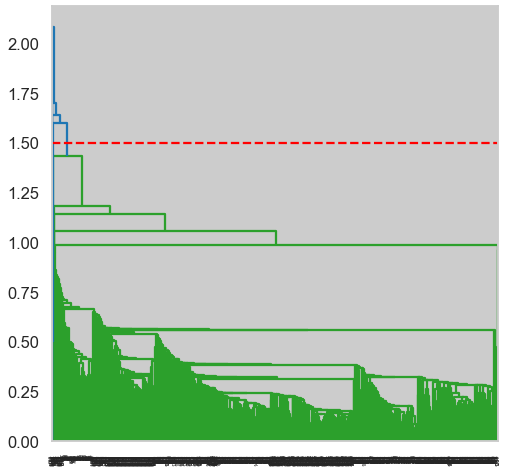

Silhouette score: 0.17400752332621522


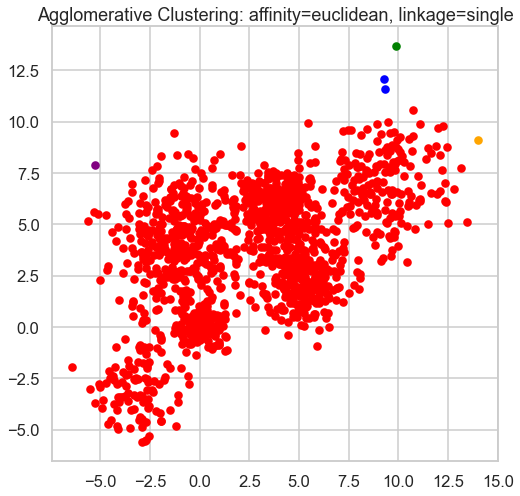

In [8]:
agglomerative_plob(Multi_blob_Data, distance_threshold=1.5 , n_clusters=None , affinity='euclidean', linkage='single')

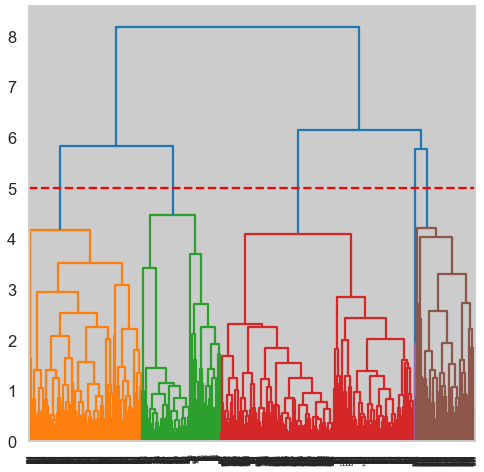

Silhouette score: 0.433187948807373


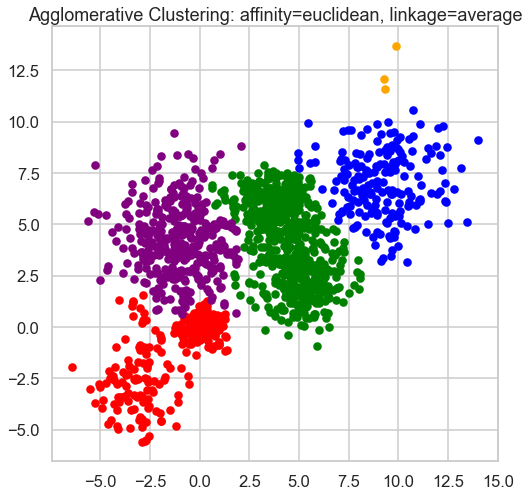

In [9]:
agglomerative_plob(Multi_blob_Data, distance_threshold=5 , n_clusters=None , affinity='euclidean', linkage='average')

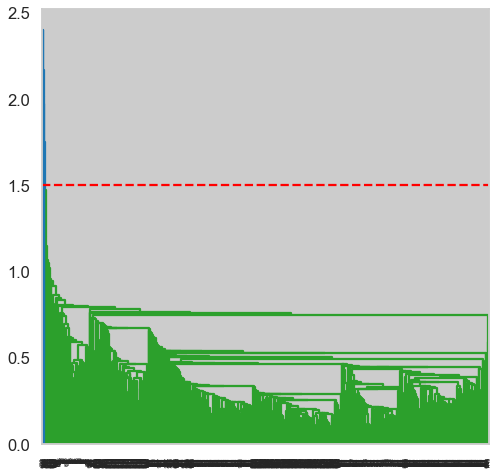

Silhouette score: 0.09516619170776609


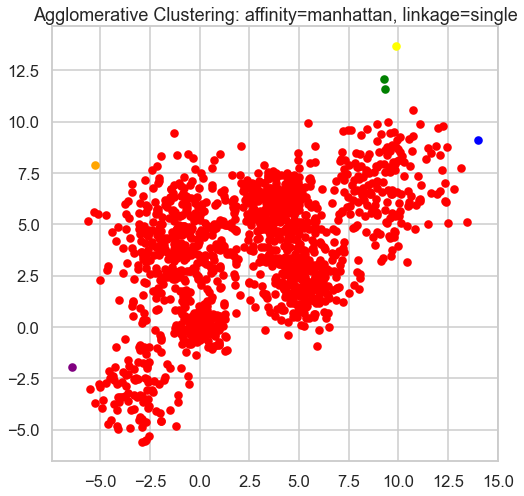

In [10]:
agglomerative_plob(Multi_blob_Data, distance_threshold=1.5 , n_clusters=None , affinity='manhattan', linkage='single')

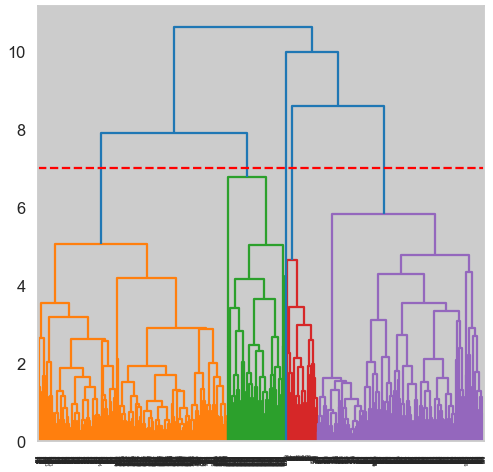

Silhouette score: 0.4099542253916625


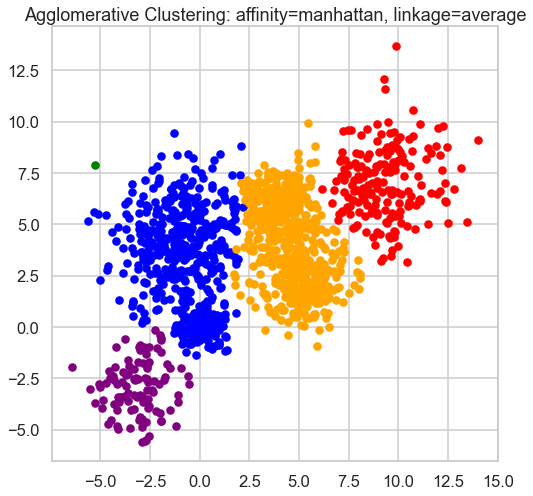

In [11]:
agglomerative_plob(Multi_blob_Data, distance_threshold=7 , n_clusters=None , affinity='manhattan', linkage='average')

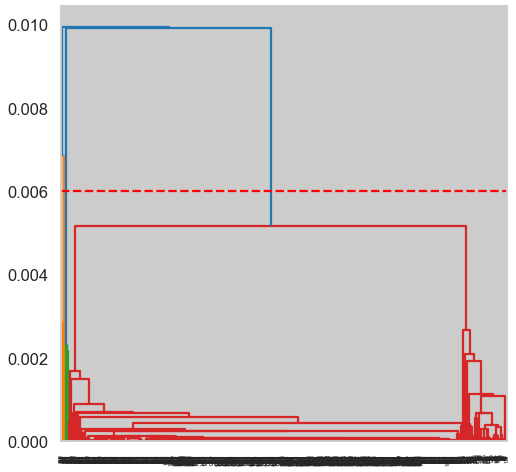

Silhouette score: 0.24075752938702236


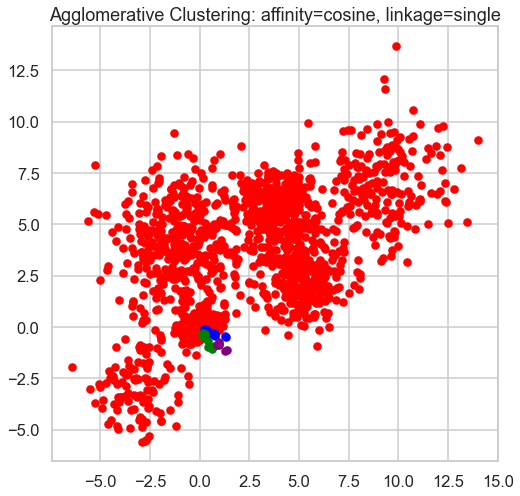

In [12]:
agglomerative_plob(Multi_blob_Data, distance_threshold=0.006 , n_clusters=None , affinity='cosine', linkage='single')

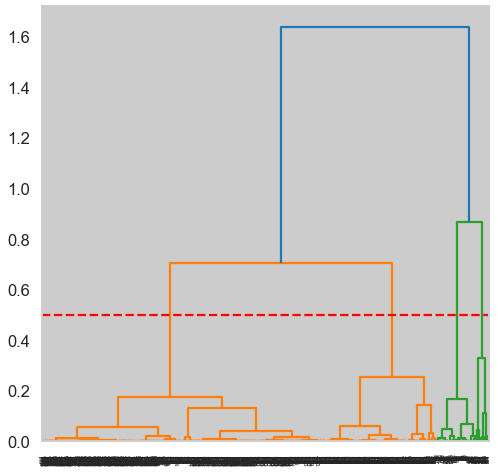

Silhouette score: 0.7813353497330464


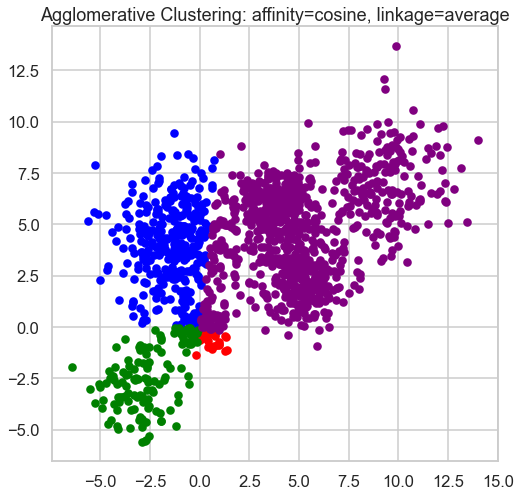

In [13]:
agglomerative_plob(Multi_blob_Data, distance_threshold=0.5, n_clusters=None, affinity='cosine', linkage='average')

Best silhouette score: 0.7813353497330464
Best number of clusters: 4
Best affinity: cosine
Best linkage: average


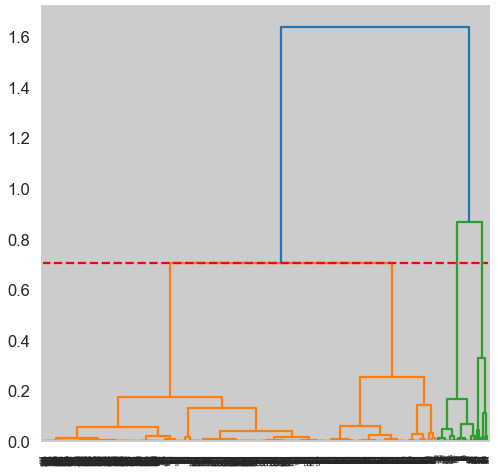

In [16]:
agglomerative(Multi_blob_Data)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [17]:
def dbscan_plob(data):
    ss = []
    epss = []
    mins = []  
    best_sil = -1
    best_eps = 0
    best_min = 0
    best_n = 1
    for j in range(5,26,1):
        for i in np.linspace(0.1,3,30):

            X = data 

            # set the parameters for DBSCAN
            eps = i  # the maximum distance between two points for them to be considered in the same neighborhood
            min_samples = j  # the minimum number of samples in a neighborhood for a point to be considered a core point

            # create an instance of the DBSCAN algorithm
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)

            # fit the algorithm to the data
            dbscan.fit(X)

            # get the labels for each point in the data
            labels = dbscan.labels_

            # get the number of clusters found by DBSCAN
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # calculate the silhouette score
            if n_clusters > 1:
                silhouette_avg = silhouette_score(X, labels)
            else:
                silhouette_avg = 0.0

            if silhouette_avg > best_sil:
                best_sil = silhouette_avg
                best_eps = i
                best_min = j
                best_n = n_clusters

            ss.append(silhouette_avg) 
            epss.append(i) 
            mins.append(j)
            
            # create a list of colors for the points
            colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

            ## plot the points with different colors based on their cluster labels
            #for n in range(n_clusters):
            #    color = colors[n % len(colors)]
            #    plt.scatter(X[labels == n, 0], X[labels == n, 1], c=color, label='Cluster %d' % n)

            ## plot the noise points as black crosses
            #plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='k', marker='x', label='Noise')

            ## add a legend to the plot
            #plt.legend()
            #plt.figure(figsize=(100,10))

            #print(f'eps {i} min_samples {j}')


    # plot the silhouette scores versus eps values
    plt.figure(figsize=(10,5))
    plt.plot(epss, ss, 'bx-')
    plt.xticks(epss)
    plt.xlabel('Values of eps')
    plt.ylabel('Silhouette Scores')
    plt.title('Silhouette Scores vs. eps values')
    plt.show()

    # plot the silhouette scores versus min_samples values
    plt.figure(figsize=(10,5))
    plt.plot(mins, ss, 'bx-')
    plt.xticks(mins)
    plt.xlabel('Values of min_samples')
    plt.ylabel('Silhouette Scores')
    plt.title('Silhouette Scores vs. min_samples values')
    plt.show()     

    print(f'Best combination: number of clusters = {best_n}, best eps = {best_eps}, best min_samples = {best_min}, to get best silhouette = {best_sil}') 
    

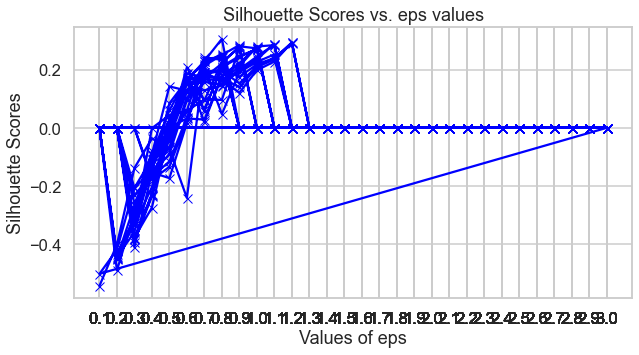

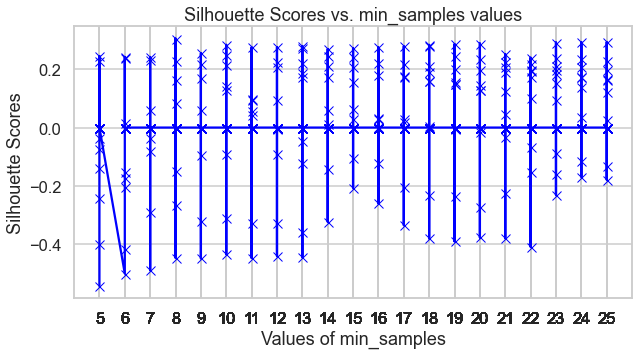

Best combination: number of clusters = 2, best eps = 0.7999999999999999, best min_samples = 8, to get best silhouette = 0.3051951203876005


In [18]:
dbscan_plob(Multi_blob_Data)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [19]:
def gmm_plob(n_clusters, data):
    # Fit a Gaussian Mixture Model with different covariance types
    covariance_types = ['spherical', 'tied', 'diag', 'full']

    best_score = -1
    best_cov = ''
    
    for covariance_type in covariance_types:
        gmm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type)
        gmm.fit(data)

        # Create a grid of points to evaluate the probability density function at
        x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
        y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        xy = np.column_stack([xx.ravel(), yy.ravel()])

        # Evaluate the probability density function at each point on the grid
        zz = np.exp(gmm.score_samples(xy))
        zz = zz.reshape(xx.shape)

        # Assign each data point to a cluster
        labels = gmm.predict(data)

        # Plot the probability density function and the clusters
        plt.figure()
        plt.title(f'GMM ({covariance_type} covariance)')
        plt.scatter(data[:, 0], data[:, 1], c=labels, alpha=0.5)
        plt.contour(xx, yy, zz)
        plt.show()
        
        # Calculate the silhouette score
        score = silhouette_score(data, labels)
        if (score > best_score):
            best_score = score
            best_cov = covariance_type
        print(f' Silhouette for covariance type {covariance_type} = {score}')
    print(f' Best Silhouette is for covariance type {covariance_type} = {score}')

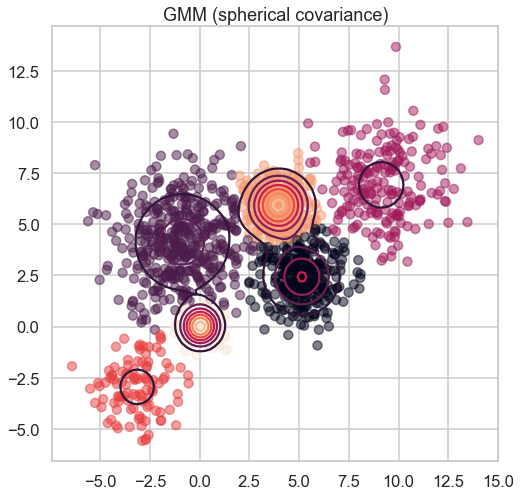

 Silhouette for covariance type spherical = 0.4543675760140813


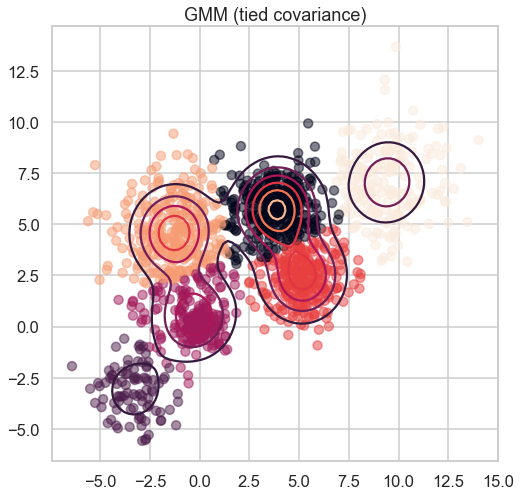

 Silhouette for covariance type tied = 0.48598896083665893


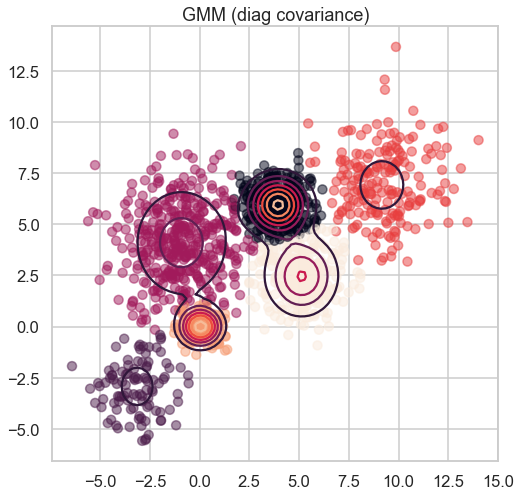

 Silhouette for covariance type diag = 0.4542555914285397


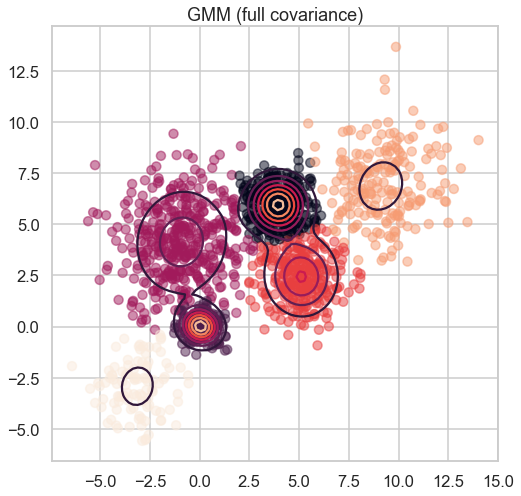

 Silhouette for covariance type full = 0.45347238469136353
 Best Silhouette is for covariance type full = 0.45347238469136353


In [20]:
gmm_plob(6, Multi_blob_Data)

## All Clustering Methods without graphs 
Here, we have same clustering methods as above for make_plob data but with graphing removed, because the iris and customer datasets have high dimensions so we can't plot them. 


In [60]:
def kmeans(Data):
    best_sil = -1
    best_k = 0
    
    distortions = []
    silhouettes = []
    for k in range(2,101,1):
        kmeans = KMeans(n_clusters=k).fit(Data)

        distortions.append(sum(np.min(cdist(Data, kmeans.cluster_centers_,'euclidean'), axis=1)) / Data.shape[0])
        sil = silhouette_score(Data, kmeans.labels_, metric='euclidean')
        silhouettes.append(sil)
        
        if (sil > best_sil) : 
            best_sil = sil
            best_k = k
                
    plt.figure(figsize=(80,4))
    plt.plot(range(2,101,1), distortions, 'bx-')
    plt.xticks(range(2,101,1))
    plt.xlabel('Values of K')
    plt.ylabel('Distortions')
    plt.title('The Elbow Method using distortions')
    plt.show()

    # Best value of K is 6
    plt.figure(figsize=(80,4))
    plt.plot(range(2,101,1), silhouettes, 'bx-')
    plt.xticks(range(2,101,1))
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette_Scores')
    plt.title('The silhouette_scores versus K')
    plt.show()
    
    print (f'best combination : best k = {best_k} , best_silhouette = {best_sil}' )   

In [62]:
def agglomerative(X):
    best_score = -1
    best_n_clusters = -1
    best_affinity = None
    best_linkage = None

    for n_clusters in range(2, 101):
        for affinity in ['euclidean', 'manhattan', 'cosine']:
            for linkage in ['single', 'average']:
                model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
                model.fit(X)
                labels = model.labels_
                silhouette = silhouette_score(X, labels, metric=affinity)
                if silhouette > best_score:
                    best_score = silhouette
                    best_n_clusters = n_clusters
                    best_affinity = affinity
                    best_linkage = linkage
    print("Best silhouette score:", best_score)
    print("Best number of clusters:", best_n_clusters)
    print("Best affinity:", best_affinity)
    print("Best linkage:", best_linkage)

    # Plot dendrogram for best linkage and affinity
    if best_affinity == 'manhattan':
        dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, metric='cityblock', method=best_linkage))
    else:
        dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, metric=best_affinity, method=best_linkage))
    # Plotting a horizontal line based on the first biggest distance between clusters 
    plt.axhline(y=silhouette, color='red', linestyle='--')
    plt.show()


In [23]:
def dbscan(data):
    ss = []
    epss = []
    mins = []  
    best_sil = -1
    best_eps = 0
    best_min = 0
    best_n = 1
    for j in range(5,26,1):
        for i in np.linspace(0.1,3,30):

            X = data 

            # set the parameters for DBSCAN
            eps = i  # the maximum distance between two points for them to be considered in the same neighborhood
            min_samples = j  # the minimum number of samples in a neighborhood for a point to be considered a core point

            # create an instance of the DBSCAN algorithm
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)

            # fit the algorithm to the data
            dbscan.fit(X)

            # get the labels for each point in the data
            labels = dbscan.labels_

            # get the number of clusters found by DBSCAN
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # create a list of colors for the points
            colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

            if n_clusters > 1:
                silhouette_avg = silhouette_score(X, labels)
            else:
                silhouette_avg = 0.0

            if silhouette_avg > best_sil:
                best_sil = silhouette_avg
                best_eps = i
                best_min = j
                best_n = n_clusters

            ss.append(silhouette_avg) 
            epss.append(i) 
            mins.append(j)

            # create a list of colors for the points
            #colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

            ## plot the points with different colors based on their cluster labels
            #for n in range(n_clusters):
            #    color = colors[n % len(colors)]
            #    plt.scatter(X[labels == n, 0], X[labels == n, 1], c=color, label='Cluster %d' % n)

            ## plot the noise points as black crosses
            #plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='k', marker='x', label='Noise')

            ## add a legend to the plot
            #plt.legend()
            #plt.figure(figsize=(100,10))

            #print(f'eps {i} min_samples {j}')

    print (f'best combination : number of clusters = {best_n} , best eps = {best_eps} , best min_samples = {best_min} , to get best silouette = {best_sil}' )       


In [63]:
def gmm(data):
    # Fit a Gaussian Mixture Model with different covariance types
    covariance_types = ['spherical', 'tied', 'diag', 'full']
    best_score = -1
    best_n_clusters = 0
    best_cov = ''
    
    for n_clusters in range(2, 101):
        for covariance_type in covariance_types:
            gmm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type)
            gmm.fit(data)

            # Calculate the silhouette score
            score = silhouette_score(data, gmm.predict(data))
            
            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
                best_cov = covariance_type
                
            #print(f'Silhouette for {n_clusters} clusters with {covariance_type} covariance type: {score:.4f}')
    
    print(f'\nBest Silhouette score: {best_score:.4f} with {best_n_clusters} clusters and {best_cov} covariance type')


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [64]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [65]:
iris_data = iris_data['data']
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [66]:
from sklearn.preprocessing import MinMaxScaler

# initialize the scaler
scaler = MinMaxScaler()

# fit and transform the data using the scaler
iris_data_normalized = scaler.fit_transform(iris_data)

# print the normalized data
print(iris_data_normalized)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

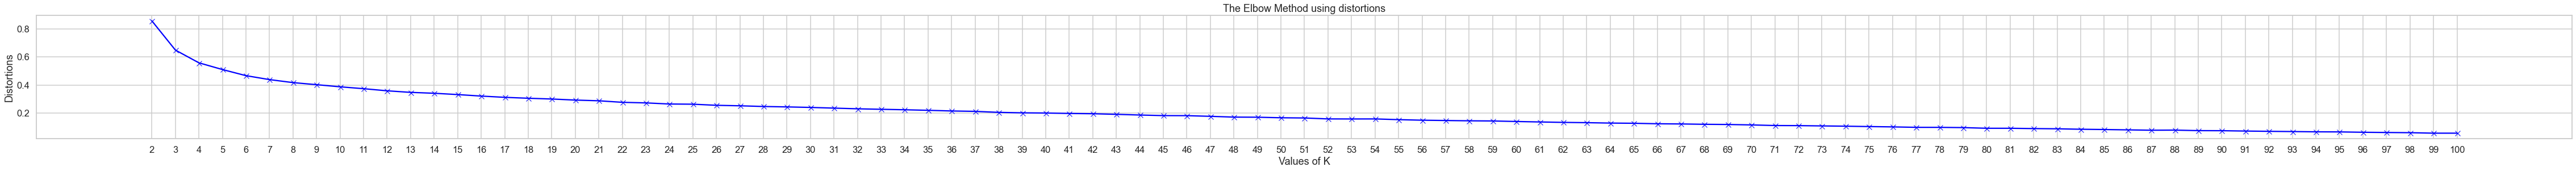

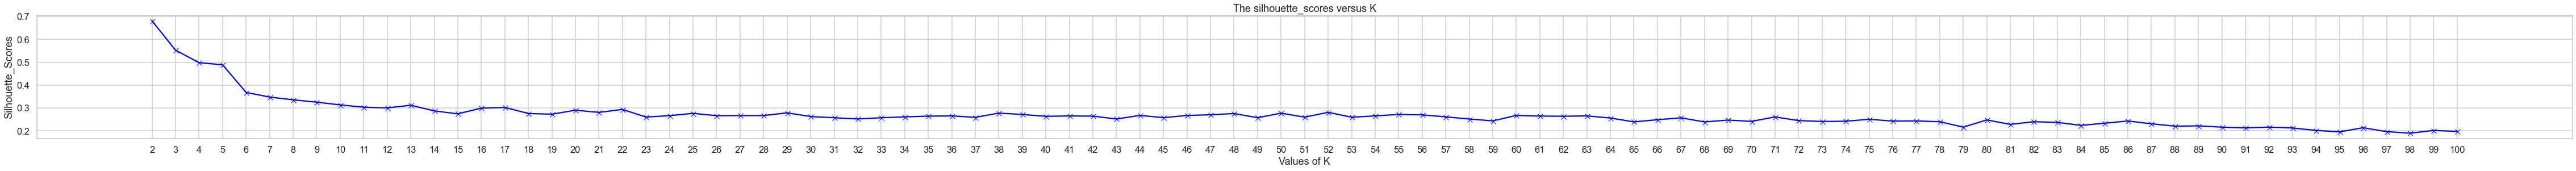

best combination : best k = 2 , best_silhouette = 0.6810461692117462


In [67]:
kmeans(iris_data)

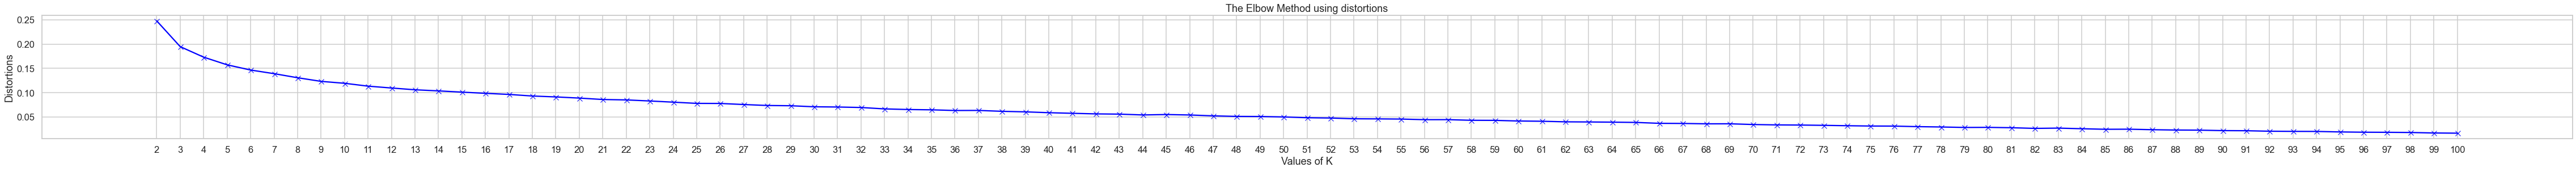

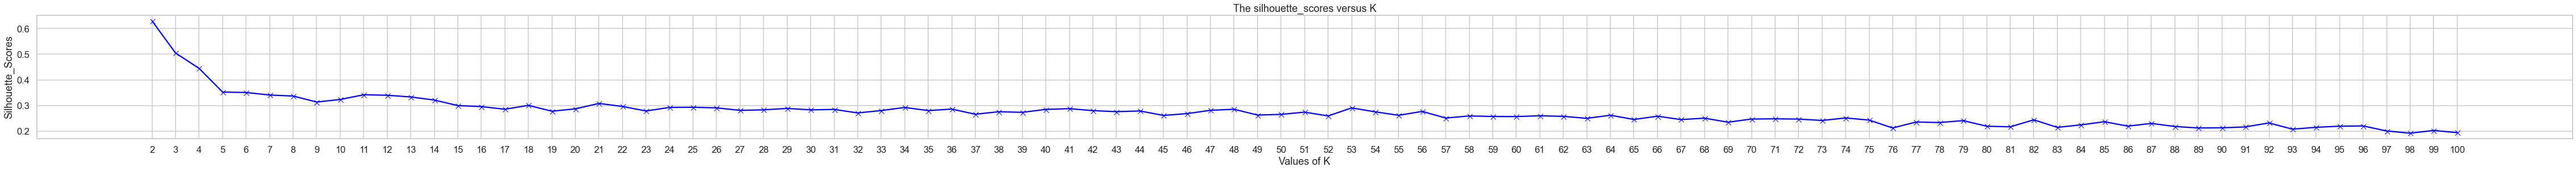

best combination : best k = 2 , best_silhouette = 0.6300471284354711


In [68]:
kmeans(iris_data_normalized)

In [69]:
gmm(iris_data)


Best Silhouette score: 0.6867 with 2 clusters and spherical covariance type


In [70]:
gmm(iris_data_normalized)


Best Silhouette score: 0.6300 with 2 clusters and spherical covariance type


In [71]:
dbscan(iris_data)

best combination : number of clusters = 2 , best eps = 0.8999999999999999 , best min_samples = 5 , to get best silouette = 0.6867350732769777


In [72]:
dbscan(iris_data_normalized)

best combination : number of clusters = 2 , best eps = 0.4 , best min_samples = 5 , to get best silouette = 0.6300471284354711


Best silhouette score: 0.9581279477970689
Best number of clusters: 2
Best affinity: cosine
Best linkage: single


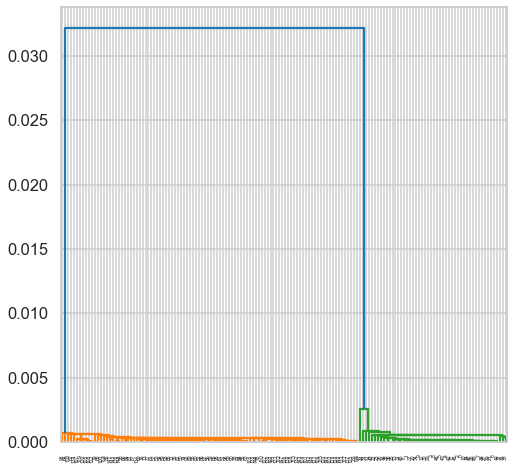

In [73]:
agglomerative(iris_data)

Best silhouette score: 0.944978329732337
Best number of clusters: 2
Best affinity: cosine
Best linkage: single


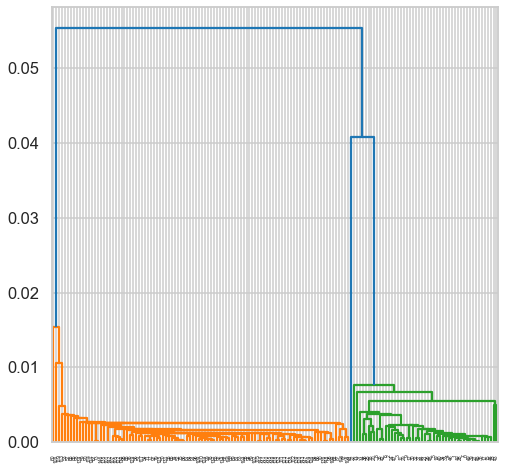

In [74]:
agglomerative(iris_data_normalized)

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [75]:
Customer_dataset = pd.read_csv('Customer data.csv', index_col=0)
Customer_dataset.head()
Customer_dataset.shape

(2000, 7)

In [76]:
from sklearn.preprocessing import MinMaxScaler

# initialize the scaler
scaler = MinMaxScaler()

# fit and transform the data using the scaler
Customer_dataset_normalized = scaler.fit_transform(Customer_dataset)

# print the normalized data
print(Customer_dataset_normalized)

[[0.         0.         0.84482759 ... 0.32478101 0.5        1.        ]
 [1.         1.         0.06896552 ... 0.42021043 0.5        1.        ]
 [0.         0.         0.53448276 ... 0.19514353 0.         0.        ]
 ...
 [0.         0.         0.22413793 ... 0.18487051 0.         0.        ]
 [1.         1.         0.10344828 ... 0.22716172 0.         0.        ]
 [0.         0.         0.12068966 ... 0.11912317 0.         0.        ]]


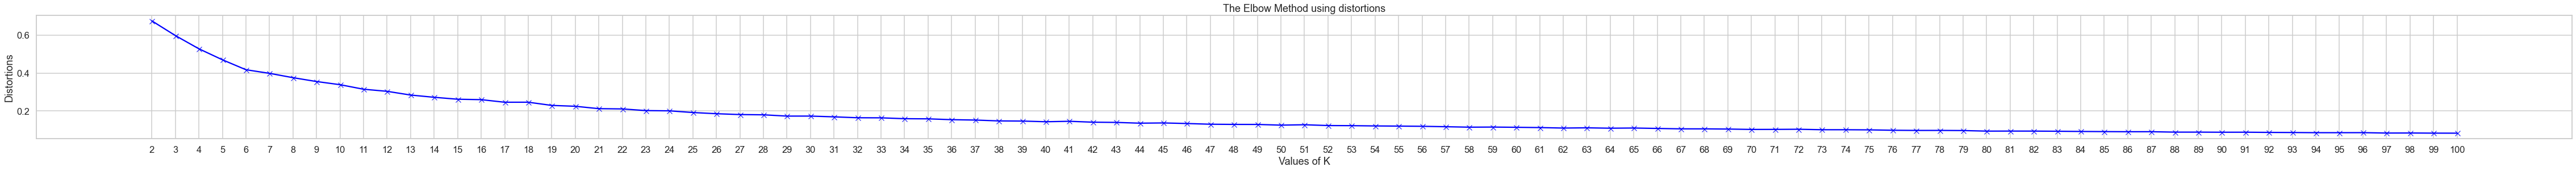

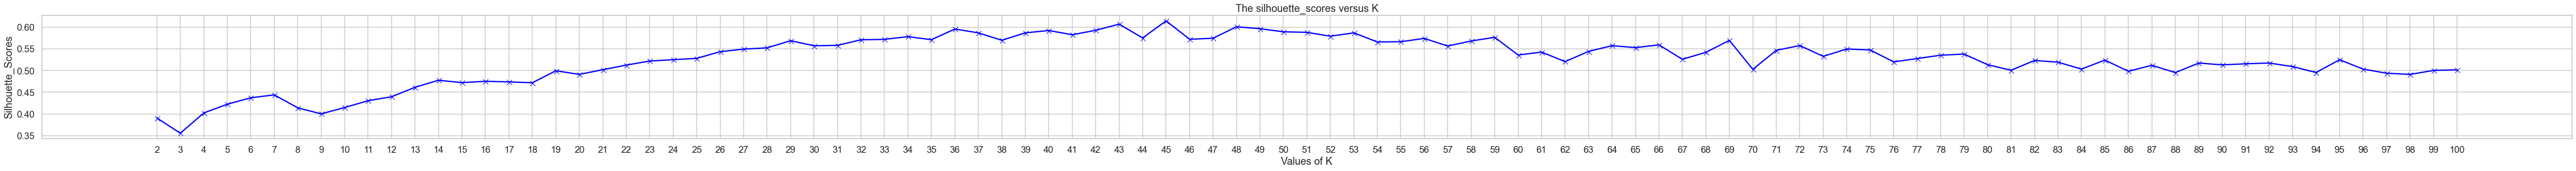

best combination : best k = 45 , best_silhouette = 0.6143837970384058


In [77]:
kmeans(Customer_dataset_normalized)

In [78]:
gmm(Customer_dataset_normalized)


Best Silhouette score: 0.6179 with 50 clusters and tied covariance type


In [79]:
dbscan(Customer_dataset_normalized)

best combination : number of clusters = 53 , best eps = 0.3 , best min_samples = 5 , to get best silouette = 0.6183605686166684


Best silhouette score: 0.7490036172817603
Best number of clusters: 73
Best affinity: cosine
Best linkage: single


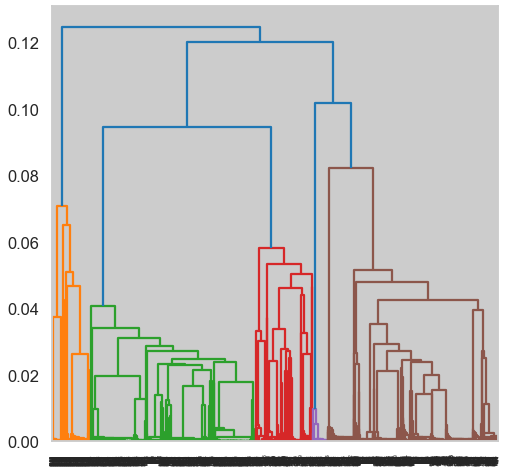

In [80]:
agglomerative(Customer_dataset_normalized)